In [44]:
import pandas as pd
import numpy as np
import nltk
import re
import heapq
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import gensim
import gensim.downloader as gensim_api
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
from transformers import AdamW, XLNetTokenizer, XLNetModel, XLNetLMHeadModel, XLNetConfig
import torch
import seaborn as sn


In [2]:
df = pd.read_csv('final_dataset.csv', index_col=0)

In [4]:
spoilers = df[df["is_spoiler"]]
spoilers_cat = spoilers.drop(['review_date','is_spoiler','rating_x','movie_id_y','duration','rating_y','release_date','review_without_stopwords','description_without_stopwords','review_summary_without_stopwords','plot_summary_without_stopwords'],1)

In [29]:
vals = []
for i in spoilers_cat.columns:
    #print(spoilers_cat[i].value_counts())
    #print(spoilers_cat[i].value_counts()[1]/(spoilers_cat[i].value_counts()[1]+spoilers_cat[i].value_counts()[0]) * 100)
    vals.append(spoilers_cat[i].value_counts()[1]/(spoilers_cat[i].value_counts()[1]+spoilers_cat[i].value_counts()[0]) * 100)

Text(0, 0.5, 'Percentage')

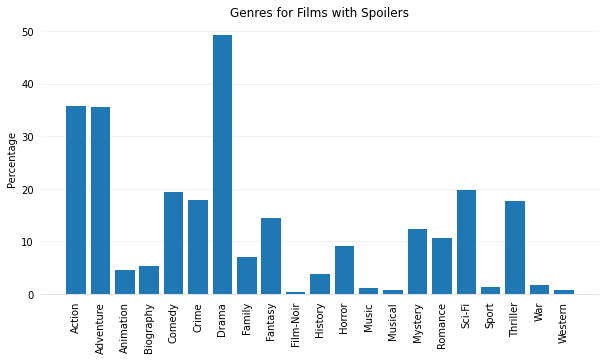

In [30]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(spoilers_cat.columns,vals)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.title("Genres for Films with Spoilers")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_ylabel("Percentage")

In [25]:
genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western']
vals = []
for genre in genres:
    genre_df = df[df[genre] == 1]
    genre_spoil = genre_df['is_spoiler']
    print(genre)
    print(genre_spoil.value_counts())
    print(genre_spoil.value_counts()[1]/(genre_spoil.value_counts()[1]+genre_spoil.value_counts()[0]) * 100)
    vals.append(genre_spoil.value_counts()[1]/(genre_spoil.value_counts()[1]+genre_spoil.value_counts()[0]) * 100)

Action
False    136819
True      53898
Name: is_spoiler, dtype: int64
28.260721382991555
Adventure
False    133558
True      53735
Name: is_spoiler, dtype: int64
28.690340802913084
Animation
False    19763
True      6834
Name: is_spoiler, dtype: int64
25.694627213595517
Biography
False    25115
True      7992
Name: is_spoiler, dtype: int64
24.139909988824115
Comedy
False    106656
True      29312
Name: is_spoiler, dtype: int64
21.558013650270652
Crime
False    82657
True     27013
Name: is_spoiler, dtype: int64
24.63116622595058
Drama
False    215129
True      74231
Name: is_spoiler, dtype: int64
25.65351119712469
Family
False    28857
True     10702
Name: is_spoiler, dtype: int64
27.053262215930634
Fantasy
False    55404
True     21694
Name: is_spoiler, dtype: int64
28.138213702041558
Film-Noir
False    1303
True      488
Name: is_spoiler, dtype: int64
27.247347850362925
History
False    18371
True      5668
Name: is_spoiler, dtype: int64
23.578351844918675
Horror
False    32905
True 

Text(0, 0.5, 'Percentage')

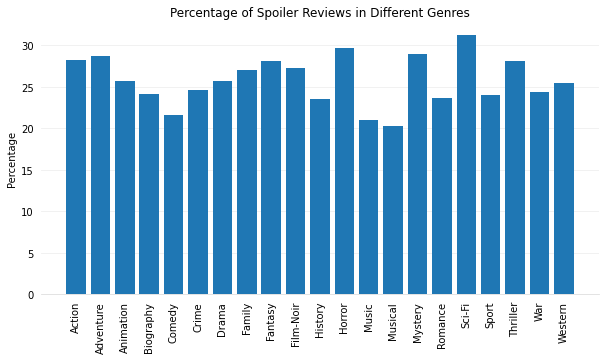

In [27]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(spoilers_cat.columns,vals)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.title("Percentage of Spoiler Reviews in Different Genres")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_ylabel("Percentage")

Logistic Regression
Accuracy :  73.79161816876572
Roc AUC score:  0.5000132964578237

Random Forest
Accuracy :  70.88453201558438
Roc AUC score:  0.5372453219755127

XGBoost
Accuracy :  73.79092119294381
Roc AUC score:  0.5

Gaussian Naive Bayes
Accuracy :  64.86056998682716
Roc AUC score:  0.5738662778432911

Light GBM
Accuracy :  73.91080103431213
Roc AUC score:  0.5054164344744163

K Nearest Neighbors
Accuracy :  69.16997149368889
Roc AUC score:  0.5421408033849902

MLP Classifier
Accuracy :  73.79092119294381
Roc AUC score:  0.5

CatBoost Classifier
Accuracy :  73.93937704301038
Roc AUC score:  0.5162844666408463


(0.3, 0.7)

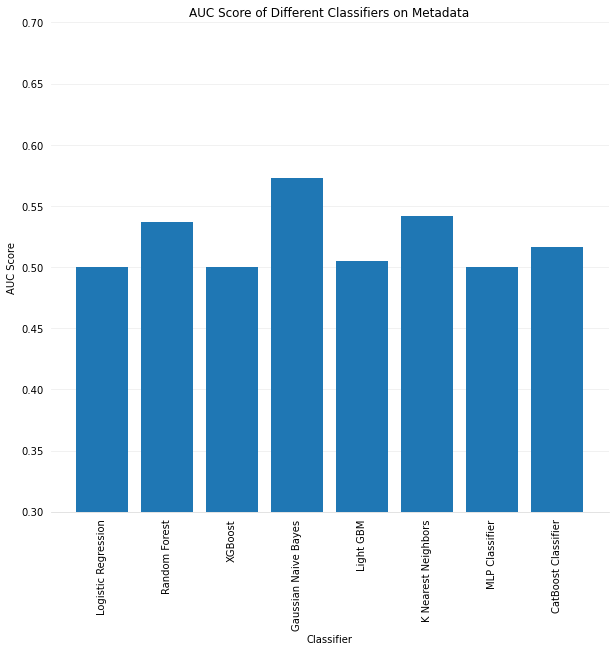

In [41]:
classifier = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Gaussian Naive Bayes', 'Light GBM', 'K Nearest Neighbors', 'MLP Classifier', 'CatBoost Classifier']
scores = [0.500,0.537,0.5,0.573,0.505,0.542,0.5,0.516]
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,9)
plt.bar(classifier,scores)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.title("AUC Score of Different Classifiers on Metadata")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_ylabel("AUC Score")
ax.set_xlabel("Classifier")
plt.ylim([0.3,0.7])

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression on Bag of Words using Review Summary')

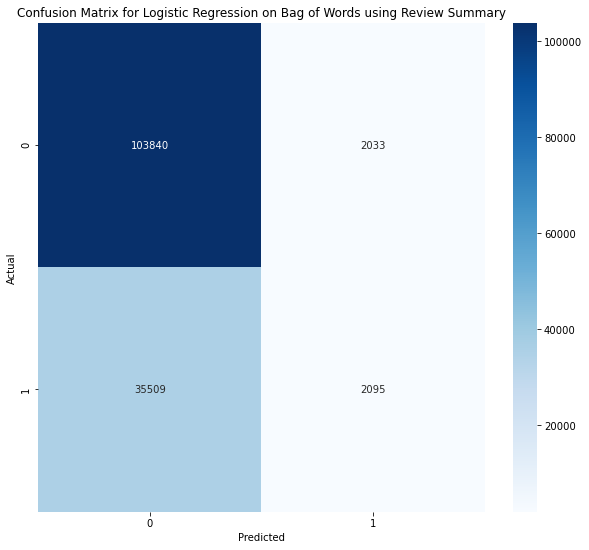

In [54]:
matrix= [[103840,2033],[ 35509,2095]]
conf_df = pd.DataFrame(matrix)
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'
sn.heatmap(conf_df, annot=True,fmt='g',cmap="Blues").set_title("Confusion Matrix for Logistic Regression on Bag of Words using Review Summary")


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression on Bag of Words using Reviews')

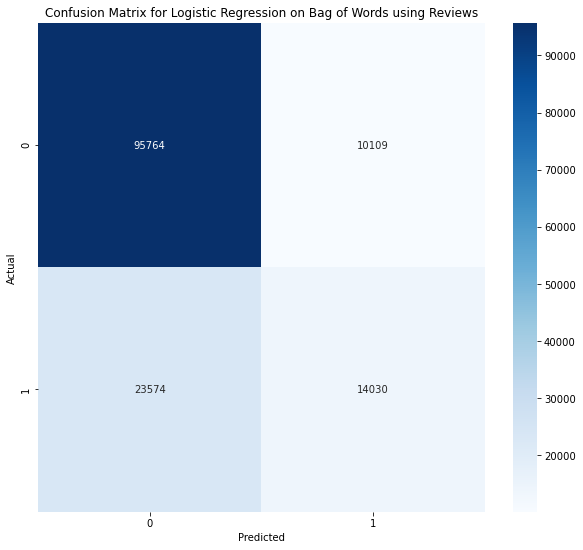

In [55]:
matrix= [[95764,10109],[ 23574,14030]]
conf_df = pd.DataFrame(matrix)
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'
sn.heatmap(conf_df, annot=True,fmt='g',cmap="Blues").set_title("Confusion Matrix for Logistic Regression on Bag of Words using Reviews")


Text(0.5, 1.0, 'Confusion Matrix for SVM on Bag of Words using Reviews')

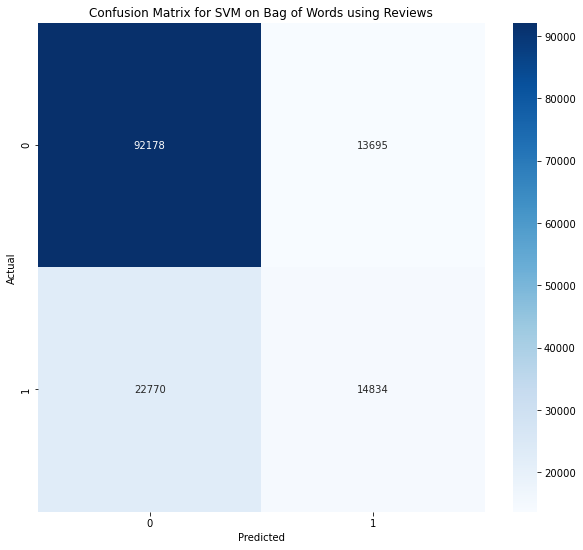

In [57]:
matrix=  [[92178 ,13695],[22770 ,14834]]
conf_df = pd.DataFrame(matrix)
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'
sn.heatmap(conf_df, annot=True,fmt='g',cmap="Blues").set_title("Confusion Matrix for SVM on Bag of Words using Reviews")


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression on TFIDF using Reviews')

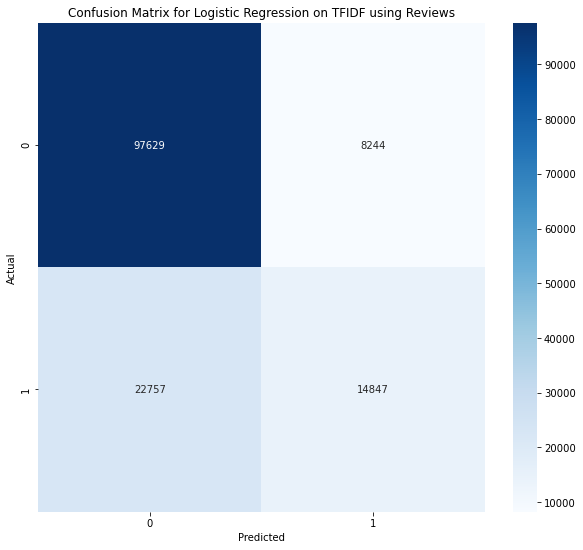

In [58]:

matrix=   [[97629 , 8244],[22757, 14847]]
conf_df = pd.DataFrame(matrix)
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'
sn.heatmap(conf_df, annot=True,fmt='g',cmap="Blues").set_title("Confusion Matrix for Logistic Regression on TFIDF using Reviews")


Text(0.5, 1.0, 'Confusion Matrix for SVM on TFIDF using Reviews')

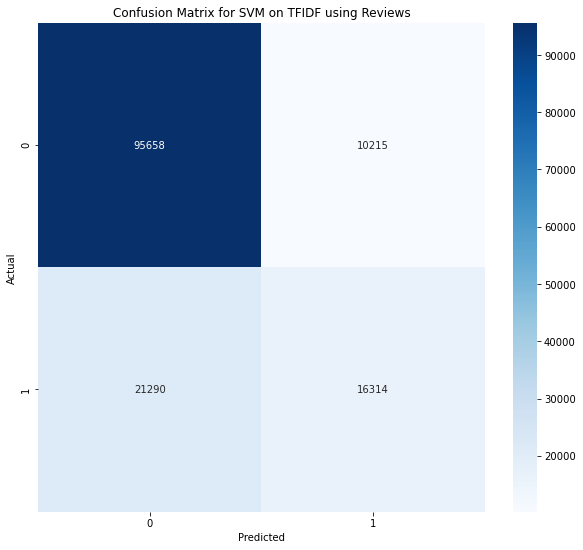

In [59]:


matrix=    [[95658, 10215], [21290, 16314]]
conf_df = pd.DataFrame(matrix)
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'
sn.heatmap(conf_df, annot=True,fmt='g',cmap="Blues").set_title("Confusion Matrix for SVM on TFIDF using Reviews")


In [8]:
df["review_summary"] = df['review_summary_without_stopwords'].str.replace('[^\w\s]','')
df["plot_summary"] = df['plot_summary_without_stopwords'].str.replace('[^\w\s]','')
df["description"] = df['description_without_stopwords'].str.replace('[^\w\s]','')
df["review"] = df['review_without_stopwords'].str.replace('[^\w\s]','')
df.drop(["review_summary_without_stopwords","plot_summary_without_stopwords","description_without_stopwords","review_without_stopwords"],1,inplace=True)
df

,Unnamed: 0,review_date,is_spoiler,rating_x,movie_id_y,duration,rating_y,release_date,Action,Adventure,...,Romance,Sci-Fi,Sport,Thriller,War,Western,review_summary,plot_summary,description,review
0,0,2006,True,10,tt0111161,142,9.3,1994,0,0,...,0,0,0,0,0,0,A classic piece unforgettable filmmaking,Chronicles experiences formerly successful ban...,In 1947 Andy Dufresne Tim Robbins banker Maine...,In Oscar year Shawshank Redemption written dir...
1,1,2000,True,10,tt0111161,142,9.3,1994,0,0,...,0,0,0,0,0,0,Simply amazing The best film 90s,Chronicles experiences formerly successful ban...,In 1947 Andy Dufresne Tim Robbins banker Maine...,The Shawshank Redemption without doubt one bri...
2,2,2001,True,8,tt0111161,142,9.3,1994,0,0,...,0,0,0,0,0,0,The best story ever told film,Chronicles experiences formerly successful ban...,In 1947 Andy Dufresne Tim Robbins banker Maine...,I believe film best story ever told film Im te...
3,3,2002,True,10,tt0111161,142,9.3,1994,0,0,...,0,0,0,0,0,0,Busy dying busy living,Chronicles experiences formerly successful ban...,In 1947 Andy Dufresne Tim Robbins banker Maine...,Yes SPOILERS hereThis film emotional impact me...
4,4,2004,True,8,tt0111161,142,9.3,1994,0,0,...,0,0,0,0,0,0,Great story wondrously told acted,Chronicles experiences formerly successful ban...,In 1947 Andy Dufresne Tim Robbins banker Maine...,At heart extraordinary movie brilliant indelib...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573901,573901,1999,False,10,tt0139239,102,7.3,1999,0,0,...,0,0,0,0,0,0,Go gave I wanted 103 minutes action lots super...,Told three perspectives story bunch young Cali...,The film told chronological format story told ...,Its time acknowledge Pulp Fiction pioneer film...
573902,573902,1999,False,9,tt0139239,102,7.3,1999,0,0,...,0,0,0,0,0,0,Right money,Told three perspectives story bunch young Cali...,The film told chronological format story told ...,I went movies last night option watching Go Wi...
573903,573903,1999,False,9,tt0139239,102,7.3,1999,0,0,...,0,0,0,0,0,0,Did somebody say Quentin Tarantino,Told three perspectives story bunch young Cali...,The film told chronological format story told ...,Not bad bad all I sucker film plays havoc poin...
573904,573904,1999,False,10,tt0139239,102,7.3,1999,0,0,...,0,0,0,0,0,0,innovative rockinI love Go,Told three perspectives story bunch young Cali...,The film told chronological format story told ...,I think movie underappreciated American audien...


In [9]:
df["review_summary"] = df['review_summary'].str.lower()
df["plot_summary"] = df['plot_summary'].str.lower()
df["description"] = df['description'].str.lower()
df["review"] = df['review'].str.lower()
df

,Unnamed: 0,review_date,is_spoiler,rating_x,movie_id_y,duration,rating_y,release_date,Action,Adventure,...,Romance,Sci-Fi,Sport,Thriller,War,Western,review_summary,plot_summary,description,review
0,0,2006,True,10,tt0111161,142,9.3,1994,0,0,...,0,0,0,0,0,0,a classic piece unforgettable filmmaking,chronicles experiences formerly successful ban...,in 1947 andy dufresne tim robbins banker maine...,in oscar year shawshank redemption written dir...
1,1,2000,True,10,tt0111161,142,9.3,1994,0,0,...,0,0,0,0,0,0,simply amazing the best film 90s,chronicles experiences formerly successful ban...,in 1947 andy dufresne tim robbins banker maine...,the shawshank redemption without doubt one bri...
2,2,2001,True,8,tt0111161,142,9.3,1994,0,0,...,0,0,0,0,0,0,the best story ever told film,chronicles experiences formerly successful ban...,in 1947 andy dufresne tim robbins banker maine...,i believe film best story ever told film im te...
3,3,2002,True,10,tt0111161,142,9.3,1994,0,0,...,0,0,0,0,0,0,busy dying busy living,chronicles experiences formerly successful ban...,in 1947 andy dufresne tim robbins banker maine...,yes spoilers herethis film emotional impact me...
4,4,2004,True,8,tt0111161,142,9.3,1994,0,0,...,0,0,0,0,0,0,great story wondrously told acted,chronicles experiences formerly successful ban...,in 1947 andy dufresne tim robbins banker maine...,at heart extraordinary movie brilliant indelib...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573901,573901,1999,False,10,tt0139239,102,7.3,1999,0,0,...,0,0,0,0,0,0,go gave i wanted 103 minutes action lots super...,told three perspectives story bunch young cali...,the film told chronological format story told ...,its time acknowledge pulp fiction pioneer film...
573902,573902,1999,False,9,tt0139239,102,7.3,1999,0,0,...,0,0,0,0,0,0,right money,told three perspectives story bunch young cali...,the film told chronological format story told ...,i went movies last night option watching go wi...
573903,573903,1999,False,9,tt0139239,102,7.3,1999,0,0,...,0,0,0,0,0,0,did somebody say quentin tarantino,told three perspectives story bunch young cali...,the film told chronological format story told ...,not bad bad all i sucker film plays havoc poin...
573904,573904,1999,False,10,tt0139239,102,7.3,1999,0,0,...,0,0,0,0,0,0,innovative rockini love go,told three perspectives story bunch young cali...,the film told chronological format story told ...,i think movie underappreciated american audien...


In [14]:
reviews = df['review_summary']
word2count = {}
for review in reviews:
    words = str(review).split(" ")
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [15]:
word2count

{'a': 57822,
 'classic': 6868,
 'piece': 1992,
 'unforgettable': 421,
 'filmmaking': 651,
 'simply': 2282,
 'amazing': 6589,
 'the': 43334,
 'best': 30106,
 'film': 40721,
 '90s': 750,
 'story': 11487,
 'ever': 16981,
 'told': 643,
 'busy': 75,
 'dying': 120,
 'living': 288,
 'great': 31242,
 'wondrously': 8,
 'acted': 718,
 'good': 34161,
 '': 32365,
 'but': 4870,
 'it': 15138,
 'is': 4241,
 'overrated': 3801,
 'by': 824,
 'some': 1540,
 'this': 15640,
 'movie': 78851,
 'saved': 247,
 'my': 4488,
 'life': 4779,
 'see': 7286,
 '1000': 64,
 'times': 1665,
 'shawshank': 282,
 'redemption': 453,
 'im': 2448,
 'convicted': 8,
 'murderer': 37,
 'provides': 87,
 'sound': 325,
 'financial': 31,
 'planning': 19,
 'excellent': 8402,
 'not': 16321,
 'greatest': 4047,
 'all': 4333,
 'time': 12969,
 'blatantly': 14,
 'simple': 986,
 'yet': 3325,
 'utterly': 559,
 'beautiful': 5098,
 'emotionally': 407,
 'fulfilling': 40,
 'films': 5673,
 'come': 1490,
 'blue': 228,
 'moon': 242,
 'yes': 1060,
 'br

In [17]:
freq_words = heapq.nlargest(100, word2count, key=word2count.get)

In [18]:
freq_words

['movie',
 'a',
 'the',
 'film',
 'good',
 '',
 'great',
 'i',
 'best',
 'one',
 'ever',
 'not',
 'this',
 'it',
 'time',
 'bad',
 'better',
 'story',
 'an',
 'fun',
 'movies',
 'like',
 'action',
 'excellent',
 'seen',
 'funny',
 'love',
 'what',
 'very',
 'see',
 'made',
 'watch',
 'comedy',
 'classic',
 'much',
 'masterpiece',
 'worst',
 'really',
 'amazing',
 'its',
 'entertaining',
 'brilliant',
 'well',
 'films',
 'you',
 'first',
 'review',
 'still',
 'beautiful',
 'another',
 'boring',
 'but',
 'life',
 'original',
 'could',
 'book',
 'worth',
 'my',
 'awesome',
 'disappointing',
 'horror',
 'just',
 'ive',
 'all',
 'get',
 'perfect',
 'thriller',
 'of',
 'is',
 'way',
 'greatest',
 'fantastic',
 'dont',
 'no',
 'new',
 'plot',
 'if',
 'overrated',
 'awful',
 'back',
 'must',
 'acting',
 'people',
 'make',
 'long',
 'waste',
 'more',
 'enjoyable',
 'wonderful',
 'sequel',
 'in',
 'so',
 'year',
 'pretty',
 'true',
 'little',
 'flick',
 'nothing',
 'yet',
 'even']

In [20]:
dict(sorted(word2count.items(), key=lambda item: item[1], reverse=True))

{'movie': 78851,
 'a': 57822,
 'the': 43334,
 'film': 40721,
 'good': 34161,
 '': 32365,
 'great': 31242,
 'i': 30430,
 'best': 30106,
 'one': 24974,
 'ever': 16981,
 'not': 16321,
 'this': 15640,
 'it': 15138,
 'time': 12969,
 'bad': 12239,
 'better': 11654,
 'story': 11487,
 'an': 10422,
 'fun': 9834,
 'movies': 9544,
 'like': 9163,
 'action': 8656,
 'excellent': 8402,
 'seen': 7853,
 'funny': 7833,
 'love': 7774,
 'what': 7665,
 'very': 7535,
 'see': 7286,
 'made': 7228,
 'watch': 7020,
 'comedy': 6886,
 'classic': 6868,
 'much': 6777,
 'masterpiece': 6684,
 'worst': 6660,
 'really': 6655,
 'amazing': 6589,
 'its': 6556,
 'entertaining': 6496,
 'brilliant': 6128,
 'well': 6060,
 'films': 5673,
 'you': 5661,
 'first': 5521,
 'review': 5247,
 'still': 5217,
 'beautiful': 5098,
 'another': 4934,
 'boring': 4884,
 'but': 4870,
 'life': 4779,
 'original': 4569,
 'could': 4560,
 'book': 4557,
 'worth': 4511,
 'my': 4488,
 'awesome': 4431,
 'disappointing': 4425,
 'horror': 4415,
 'just': 

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sahilvaidya/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
df['review_summary'] = df['review_summary'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))

In [24]:
reviews = df['review_summary']
word2count = {}
for review in reviews:
    words = str(review).split(" ")
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [28]:
sort = dict(sorted(word2count.items(), key=lambda item: item[1], reverse=True))
sort

{'movie': 78851,
 'film': 40721,
 'good': 34161,
 'great': 31242,
 'best': 30106,
 'one': 24974,
 'ever': 16981,
 'time': 12969,
 'bad': 12239,
 'better': 11654,
 'story': 11487,
 'fun': 9834,
 'movies': 9544,
 'like': 9163,
 'action': 8656,
 'excellent': 8402,
 'seen': 7853,
 'funny': 7833,
 'love': 7774,
 'see': 7286,
 'made': 7228,
 'watch': 7020,
 'comedy': 6886,
 'classic': 6868,
 'much': 6777,
 'masterpiece': 6684,
 'worst': 6660,
 'really': 6655,
 'amazing': 6589,
 'entertaining': 6496,
 'brilliant': 6128,
 'well': 6060,
 'films': 5673,
 'first': 5521,
 'review': 5247,
 'still': 5217,
 'beautiful': 5098,
 'another': 4934,
 'boring': 4884,
 'life': 4779,
 'original': 4569,
 'could': 4560,
 'book': 4557,
 'worth': 4511,
 'awesome': 4431,
 'disappointing': 4425,
 'horror': 4415,
 'ive': 4356,
 'get': 4326,
 'perfect': 4312,
 'thriller': 4282,
 'way': 4159,
 'greatest': 4047,
 'fantastic': 4035,
 'dont': 4009,
 'new': 3875,
 'plot': 3863,
 'overrated': 3801,
 'awful': 3708,
 'back':

([<matplotlib.patches.Wedge at 0x7f66146dbd90>,
 [Text(0.7952215182961836, 0.7600149582993171, 'movie'),
  Text(-0.3757893585308204, 1.0338193062692314, 'film'),
  Text(-0.9665099107378274, 0.5252224218800614, 'good'),
  Text(-1.0900067303449703, -0.14793690480291677, 'great'),
  Text(-0.8209037858428827, -0.7322000917705642, 'best'),
  Text(-0.33518105197450404, -1.0476896784817846, 'one'),
  Text(0.10567593267304409, -1.0949121413399718, 'ever'),
  Text(0.4140716888033118, -1.01909010226357, 'time'),
  Text(0.6478707458371643, -0.8889676578416094, 'bad'),
  Text(0.8342843826320963, -0.7169167098737359, 'better'),
  Text(0.9726161304366461, -0.5138266855803085, 'story'),
  Text(1.0572288232629683, -0.30375518968735277, 'fun'),
  Text(1.0953153033285183, -0.10141196327039535, 'movies')])

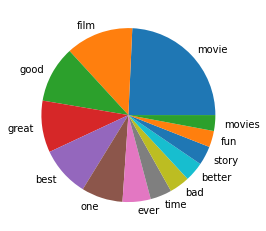

In [36]:
results = {'movie': 78851,
 'film': 40721,
 'good': 34161,
 'great': 31242,
 'best': 30106,
 'one': 24974,
 'ever': 16981,
 'time': 12969,
 'bad': 12239,
 'better': 11654,
 'story': 11487,
 'fun': 9834,
 'movies': 9544}
plt.pie([float(v) for v in results.values()], labels=[k for k in results.keys()],
           autopct=None)

In [37]:
df['plot_summary'] = df['plot_summary'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))

In [38]:
reviews = df['plot_summary']
word2count = {}
for review in reviews:
    words = str(review).split(" ")
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1
sort = dict(sorted(word2count.items(), key=lambda item: item[1], reverse=True))
sort

{'written': 549926,
 'one': 183940,
 'life': 168135,
 'new': 151771,
 'world': 120461,
 'man': 118186,
 'two': 98824,
 'find': 97046,
 'must': 91950,
 'young': 91064,
 'time': 88859,
 'family': 88117,
 'love': 86225,
 'years': 84906,
 'back': 84747,
 'get': 81085,
 'help': 77098,
 'father': 76140,
 'story': 72838,
 'way': 69851,
 'however': 69397,
 'war': 67898,
 'finds': 67341,
 'named': 64195,
 'friends': 62499,
 'take': 59042,
 'day': 57002,
 'also': 56408,
 'first': 55991,
 'wife': 55493,
 'city': 53997,
 'home': 53900,
 'john': 53261,
 'friend': 53042,
 'go': 52602,
 'together': 52493,
 'team': 52305,
 'make': 51634,
 'soon': 50242,
 'begins': 49979,
 'people': 49428,
 'lives': 48903,
 'son': 47237,
 'becomes': 47191,
 'year': 46629,
 'hes': 46245,
 'school': 46107,
 'set': 45537,
 'mother': 44703,
 'woman': 44517,
 'earth': 44467,
 'meets': 44207,
 'later': 43835,
 'death': 43596,
 'old': 43587,
 'wants': 43408,
 'stop': 43009,
 'men': 42969,
 'takes': 42005,
 'town': 41865,
 'de

([<matplotlib.patches.Wedge at 0x7f66278faee0>,
 [Text(0.721409567654356, 0.8304024540527053, 'written'),
  Text(-0.454952001613217, 1.0015082007792686, 'one'),
  Text(-0.9099279222693358, 0.6180867061138021, 'life'),
  Text(-1.094613841477247, 0.10872229783455023, 'new'),
  Text(-1.0425875184249718, -0.350729620112786, 'world'),
  Text(-0.8443139682379178, -0.7050772461499099, 'man'),
  Text(-0.5631142605896559, -0.9449350927553519, 'two'),
  Text(-0.25367272458972484, -1.0703504794221497, 'find'),
  Text(0.06740381490371355, -1.0979329331687004, 'must'),
  Text(0.3730815316716593, -1.0347995799793934, 'young'),
  Text(0.644440858557708, -0.8914572226536752, 'time'),
  Text(0.8625179587573584, -0.6826879014755133, 'family'),
  Text(1.0138868217037922, -0.4266538559246627, 'love'),
  Text(1.0904179251268507, -0.1448749411114772, 'years')])

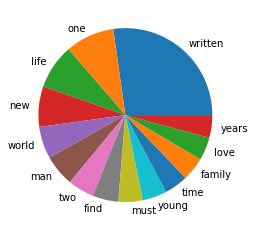

In [40]:
results = {'written': 549926,
 'one': 183940,
 'life': 168135,
 'new': 151771,
 'world': 120461,
 'man': 118186,
 'two': 98824,
 'find': 97046,
 'must': 91950,
 'young': 91064,
 'time': 88859,
 'family': 88117,
 'love': 86225,
 'years': 84906}
plt.pie([float(v) for v in results.values()], labels=[k for k in results.keys()],
           autopct=None)

In [ ]:
df['description'] = df['description'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))

In [ ]:
reviews = df['description']
word2count = {}
for review in reviews:
    words = str(review).split(" ")
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1
sort = dict(sorted(word2count.items(), key=lambda item: item[1], reverse=True))
sort

In [3]:
import re


def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text


In [5]:
df["review_summary_without_stopwords"] = df["review_summary_without_stopwords"].astype(str)

In [8]:
X = df["review_summary_without_stopwords"]
y = df['is_spoiler']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer



# Transform each text into a vector of word counts
vectorizer = CountVectorizer(stop_words="english",
                             preprocessor=clean_text)

train_bow = vectorizer.fit_transform(X_train)  
test_bow = vectorizer.transform(X_test)  

In [14]:
lr = LogisticRegression(max_iter=1000)
lr.fit(train_bow,y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_pred = lr.predict(test_bow)
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Roc AUC score: ", roc_auc_score(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))

Accuracy :  73.83413369390216
Roc AUC score:  0.5182549532632866
Confusion matrix
 [[103840   2033]
 [ 35509   2095]]


In [19]:
svc = LinearSVC()
svc.fit(train_bow,y_train)

/home/sahilvaidya/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [21]:
y_pred = svc.predict(test_bow)
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Roc AUC score: ", roc_auc_score(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))

Accuracy :  73.05630867665201
Roc AUC score:  0.5191061940680388
Confusion matrix
 [[102010   3863]
 [ 34795   2809]]


In [24]:
gnb = GaussianNB()
gnb.fit(train_bow,y_train)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [27]:
rf = RandomForestClassifier()
rf.fit(train_bow,y_train)

KeyboardInterrupt: 

In [29]:
dt = DecisionTreeClassifier()
dt.fit(train_bow,y_train)

KeyboardInterrupt: 

In [6]:
df["review_without_stopwords"] = df["review_without_stopwords"].astype(str)

In [31]:
X = df["review_without_stopwords"]
y = df['is_spoiler']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [33]:
# Transform each text into a vector of word counts
vectorizer = CountVectorizer(stop_words="english",
                             preprocessor=clean_text)

train_bow = vectorizer.fit_transform(X_train)  
test_bow = vectorizer.transform(X_test) 

In [36]:
lr = LogisticRegression(max_iter=5000)
lr.fit(train_bow,y_train)

LogisticRegression(max_iter=5000)

In [37]:
y_pred = lr.predict(test_bow)
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Roc AUC score: ", roc_auc_score(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))

Accuracy :  76.56627891578441
Roc AUC score:  0.6387618437689744
Confusion matrix
 [[95864 10009]
 [23613 13991]]


In [38]:
svc = LinearSVC()
svc.fit(train_bow,y_train)

/home/sahilvaidya/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [39]:
y_pred = svc.predict(test_bow)
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Roc AUC score: ", roc_auc_score(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))

Accuracy :  74.58477665409788
Roc AUC score:  0.6325631089275454
Confusion matrix
 [[92178 13695]
 [22770 14834]]


In [40]:
svc = LinearSVC(max_iter=5000)
svc.fit(train_bow,y_train)

/home/sahilvaidya/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=5000)

In [41]:
y_pred = svc.predict(test_bow)
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Roc AUC score: ", roc_auc_score(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))

Accuracy :  74.50253350711263
Roc AUC score:  0.6320315589349834
Confusion matrix
 [[92057 13816]
 [22767 14837]]


# Using TFidf

In [ ]:
df["review_summary_without_stopwords"] = df["review_summary_without_stopwords"].astype(str)
X = df["review_summary_without_stopwords"]
y = df['is_spoiler']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# Transform each text into a vector of word counts
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text, ngram_range=(1,2))

train_bow = vectorizer.fit_transform(X_train)  
test_bow = vectorizer.transform(X_test)  
lr = LogisticRegression(max_iter=1000)
lr.fit(train_bow,y_train)
y_pred = lr.predict(test_bow)
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Roc AUC score: ", roc_auc_score(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))
# Accuracy :  74.07946918321403
# Roc AUC score:  0.5170879622445814
# Confusion matrix
#  [[104522   1351]
#  [ 35839   1765]]

svc = LinearSVC()
svc.fit(train_bow,y_train)
y_pred = svc.predict(test_bow)
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Roc AUC score: ", roc_auc_score(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))
# Accuracy :  71.16332234434788
# Roc AUC score:  0.5244731482072559
# Confusion matrix
#  [[97172  8701]
#  [32673  4931]]

In [20]:
df["review_without_stopwords"] = df["review_without_stopwords"].astype(str)
X = df["review_without_stopwords"]
y = df['is_spoiler']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# Transform each text into a vector of word counts
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text, ngram_range=(1,2))

train_bow = vectorizer.fit_transform(X_train)  
test_bow = vectorizer.transform(X_test)  

In [21]:
lr = LogisticRegression(max_iter=1000)
lr.fit(train_bow,y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred = lr.predict(test_bow)
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Roc AUC score: ", roc_auc_score(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))

Accuracy :  78.39305254500721
Roc AUC score:  0.6584790701870649
Confusion matrix
 [[97629  8244]
 [22757 14847]]


In [23]:
svc = LinearSVC()
svc.fit(train_bow,y_train)

LinearSVC()

In [24]:
y_pred = svc.predict(test_bow)
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Roc AUC score: ", roc_auc_score(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))

Accuracy :  78.0417767307652
Roc AUC score:  0.6686766515792077
Confusion matrix
 [[95658 10215]
 [21290 16314]]


In [26]:
mnb = MultinomialNB()
mnb.fit(train_bow,y_train)


MultinomialNB()

In [27]:
y_pred = mnb.predict(test_bow)
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Roc AUC score: ", roc_auc_score(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))

Accuracy :  73.79092119294381
Roc AUC score:  0.5
Confusion matrix
 [[105873      0]
 [ 37604      0]]


# Word2Vec

In [8]:
clean_review_sum = df["review_summary_without_stopwords"].apply(lambda x: clean_text(x))
clean_review_sum

0                a classic piece unforgettable film making 
1                        simply amazing  the best film 90s 
2                             the best story ever told film
3                                   busy dying busy living 
4                        great story  wondrously told acted
                                ...                        
573901    go gave i wanted 103 minutes action  lots supe...
573902                                          right money
573903                  did somebody say quentin tarantino 
573904                       innovative rockin   i love go 
573905                                            knot bows
Name: review_summary_without_stopwords, Length: 573906, dtype: object

In [9]:
corpus = []
for string in clean_review_sum:
    words = string.split()
    grams = [" ".join(words[i:i+1]) for i in range(0, len(words), 1)]
    corpus.append(grams)
corpus

[['a', 'classic', 'piece', 'unforgettable', 'film', 'making'],
 ['simply', 'amazing', 'the', 'best', 'film', '90s'],
 ['the', 'best', 'story', 'ever', 'told', 'film'],
 ['busy', 'dying', 'busy', 'living'],
 ['great', 'story', 'wondrously', 'told', 'acted'],
 ['good', 'but', 'it', 'is', 'overrated', 'by', 'some'],
 ['this', 'movie', 'saved', 'my', 'life'],
 ['movie', 'see', '1000', 'times'],
 ['the', 'shawshank', 'redemption'],
 ['im', 'convicted', 'murderer', 'provides', 'sound', 'financial', 'planning'],
 ['excellent', 'movie', 'but', 'not', 'greatest', 'all', 'time'],
 ['blatantly', 'simple', 'yet', 'utterly', 'beautiful'],
 ['emotionally', 'fulfilling'],
 ['great', 'films', 'come', 'blue', 'moon'],
 ['yes'],
 ['brilliant', 'moved', 'way', 'i', 'never', 'thought', 'possible'],
 ['rita', 'hayworth', 'shawshank', 'redemption'],
 ['the', 'epitome', 'film', 'excellence'],
 ['inspiration', 'perfected'],
 ['great', 'movie', 'great', 'actors', 'great', 'story'],
 ['a',
  'bit',
  'over',
  

In [14]:
bigrams_detector = gensim.models.phrases.Phrases(corpus, min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[corpus], min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)


In [21]:
nlp = gensim.models.word2vec.Word2Vec(corpus, vector_size=300,window=8, min_count=1, sg=1, epochs=30, workers=-1)

In [22]:
word = "movie"
nlp[word].shape

TypeError: 'Word2Vec' object is not subscriptable

In [27]:
nlp.wv.most_similar(positive="action")

[('packed', 0.5809927582740784),
 ('piratey', 0.5281006097793579),
 ('slyvester', 0.5247024297714233),
 ('acton', 0.5209351181983948),
 ('bangin', 0.5193603038787842),
 ('lotso', 0.5141608119010925),
 ('frasier', 0.511360764503479),
 ('skydiving', 0.5106939673423767),
 ('amenable', 0.5100718140602112),
 ('im3', 0.5094882249832153)]

In [30]:
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
text2seq= tokenizer.texts_to_sequences(corpus)
## padding sequence
X_train = kprocessing.sequence.pad_sequences(text2seq, 
                    maxlen=15, padding="post", truncating="post")


In [35]:
nlp.wv['hi']

array([-0.14073119, -0.6979565 ,  0.5641189 ,  0.49353522, -0.66274875,
       -0.3081911 , -0.79366297,  0.7016341 , -0.16769592,  0.04736556,
       -0.2019282 , -0.2792989 , -0.17410132, -0.44596207, -0.11801072,
       -0.502476  , -0.23379934, -0.04103769, -0.1180518 , -0.34730163,
        0.03899939,  0.5207692 ,  0.3356951 , -0.4496312 ,  0.81173617,
       -0.26994976, -0.22082762,  0.3576859 , -0.13702975, -0.44781223,
       -0.02722907, -0.6201995 , -0.39539737, -0.36902136,  0.5109042 ,
       -0.13425073, -0.06010684, -0.2757083 ,  0.03036918,  0.89335525,
       -0.12657388, -0.25066745,  0.32875252, -0.14121355,  0.3362576 ,
        0.65919256,  0.3716166 , -0.39227682,  0.24795076, -0.6458693 ,
        0.22658399, -0.3172681 ,  0.51161325,  0.27861625,  0.06491141,
       -0.42320254, -0.37052462, -0.27486497,  0.87541467,  0.25120303,
       -0.06556933,  0.09149869, -0.7040717 , -0.07275701, -0.31457016,
       -0.13906312,  0.22364104, -0.4493861 , -0.5878919 ,  0.90

In [36]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp.wv[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

In [37]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x

## input
x_in = layers.Input(shape=(15,))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)
## apply attention
x = attention_layer(x, neurons=15)
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2, 
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(3, activation='softmax')(x)
## compile
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 15, 300)      15820500    input_1[0][0]                    
__________________________________________________________________________________________________
permute (Permute)               (None, 300, 15)      0           embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 300, 15)      240         permute[0][0]                    
______________________________________________________________________________________________

In [38]:
y_train = df['is_spoiler']

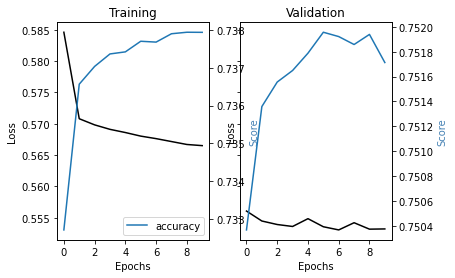

In [39]:
## encode y
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])
## train
training = model.fit(x=X_train, y=y_train, batch_size=256, 
                     epochs=10, shuffle=True, verbose=0, 
                     validation_split=0.3)
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [40]:
X = df["review_summary_without_stopwords"]
y = df['is_spoiler']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
corpus_test = X_test

## create list of n-grams
lst_corpus = []
for string in corpus_test:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
    
## detect common bigrams and trigrams using the fitted detectors
lst_corpus = list(bigrams_detector[lst_corpus])
lst_corpus = list(trigrams_detector[lst_corpus])
## text to sequence with the fitted tokenizer
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)

## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=15,
             padding="post", truncating="post")


In [41]:
predicted_prob = model.predict(X_test)
predicted = [dic_y_mapping[np.argmax(pred)] for pred in 
             predicted_prob]

In [45]:
print(predicted_prob)

[[7.3030972e-01 2.6968715e-01 3.0952094e-06]
 [7.1181309e-01 2.8818381e-01 3.0428507e-06]
 [7.7888721e-01 2.2111124e-01 1.5566848e-06]
 ...
 [7.5493324e-01 2.4506430e-01 2.5287393e-06]
 [6.9013280e-01 3.0984074e-01 2.6514026e-05]
 [6.2712795e-01 3.7286961e-01 2.4412443e-06]]


In [46]:
accuracy_score(y_test, predicted)

0.7394704377705137

In [47]:
roc_auc_score(y_test, predicted)

0.5042816269546044

# With actual reviews

In [7]:
clean_review = df["review_without_stopwords"].apply(lambda x: clean_text(x))
clean_review

0         in oscar year  shawshank redemption  written d...
1         the shawshank redemption without doubt one bri...
2         i believe film best story ever told film  im t...
3           yes  spoilers here  this film emotional impa...
4         at heart extraordinary movie brilliant indelib...
                                ...                        
573901    its time acknowledge pulp fiction pioneer film...
573902    i went movies last night  option watching go w...
573903    not bad  bad all  i sucker film plays havoc po...
573904    i think movie under appreciated american audie...
573905    i saw go  knot bows   interesting look teenage...
Name: review_without_stopwords, Length: 573906, dtype: object

In [9]:
corpus = []
for string in clean_review:
    words = string.split()
    grams = [" ".join(words[i:i+1]) for i in range(0, len(words), 1)]
    corpus.append(grams)
corpus

[['in',
  'oscar',
  'year',
  'shawshank',
  'redemption',
  'written',
  'directed',
  'frank',
  'darabont',
  'novella',
  'rita',
  'hayworth',
  'shawshank',
  'redemption',
  'stephen',
  'king',
  'nominated',
  'seven',
  'academy',
  'awards',
  'walked',
  'away',
  'zero',
  'best',
  'picture',
  'went',
  'forrest',
  'gump',
  'shawshank',
  'pulp',
  'fiction',
  'just',
  'happy',
  'nominated',
  'of',
  'course',
  'hindsight',
  '20',
  '20',
  'history',
  'looks',
  'back',
  'gump',
  'good',
  'film',
  'pulp',
  'redemption',
  'remembered',
  'all',
  'time',
  'best',
  'pulp',
  'however',
  'success',
  'word',
  'go',
  'making',
  'huge',
  'splash',
  'cannes',
  'making',
  'writer',
  'director',
  'american',
  'master',
  'two',
  'films',
  'for',
  'andy',
  'dufresne',
  'co',
  'success',
  'come',
  'easy',
  'fortunately',
  'failure',
  'life',
  'sentence',
  'after',
  'opening',
  '33',
  'screens',
  'take',
  '727',
  '327',
  '25m',
  'f

In [10]:
bigrams_detector = gensim.models.phrases.Phrases(corpus, min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[corpus], min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [11]:
nlp = gensim.models.word2vec.Word2Vec(corpus, vector_size=300,window=8, min_count=1, sg=1, epochs=30, workers=-1)

In [20]:
nlp.wv.most_similar(positive="outdistancing")

[('zil', 0.2631087005138397),
 ('sybelle', 0.2535071074962616),
 ('debtor', 0.24705693125724792),
 ('brussels', 0.24338564276695251),
 ('ignoraamuses', 0.23925268650054932),
 ('imedlda', 0.2332138568162918),
 ('disquiet', 0.2330714464187622),
 ('beutifully', 0.23234564065933228),
 ('wait\x97whiplash', 0.2303476333618164),
 ('fillon', 0.22709618508815765)]

In [6]:
X = df["review_summary_without_stopwords"].apply(lambda x: clean_text(x))
y = df['is_spoiler']
y = y.apply(lambda x: 1 if x else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
input_txt = "Text data"
encodings = tokenizer.encode_plus(input_txt,add_special_tokens=True, max_length=16, return_tensors='pt', return_token_type_ids=False, return_attention_mask=True, pad_to_max_length=True)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/sahilvaidya/anaconda3/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [8]:
encodings

{'input_ids': tensor([[    5,     5,     5,     5,     5,     5,     5,     5,     5,     5,
             5,     5, 14374,   527,     4,     3]]), 'attention_mask': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])}

In [52]:
def plot_sentence_embeddings_length(text_list, tokenizer):
    tokenized_texts = list(map(lambda t: tokenizer.tokenize(t), text_list))
    tokenized_texts_len = list(map(lambda t: len(t), tokenized_texts))
    fig, ax = plt.subplots(figsize=(8, 5));
    ax.hist(tokenized_texts_len, bins=40);
    ax.set_xlabel("Length of Comment Embeddings");
    ax.set_ylabel("Number of Comments");
    return
    
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)

train_text_list = X_train.values
test_text_list = X_test.values

plot_sentence_embeddings_length(train_text_list, tokenizer)

plot_sentence_embeddings_length(test_text_list, tokenizer)

AttributeError: 'NoneType' object has no attribute 'tokenize'